In [1]:
import numpy as np
import pandas as pd #downloading the packages
import matplotlib.pyplot as plt
import scipy.optimize
import tensorflow as tf
import tensorflow_probability as tfp


#from sklearn.stats import t

import sklearn as sk
import scipy.optimize as optimize

from scipy.stats import t
import distfit
from distfit import distfit


KeyboardInterrupt



In [2]:
data_1=pd.read_csv(r'C:\Users\work\Downloads\finaldata-1 (3).zip')#downloading the data

In [3]:
data_1#inspecting the data


,SNo,Year,RA(J2000) (degree),Dec(J2000) (degree),Distance (kpc),Disterr (kpc),P (%),Perr (%),PA (degree),PAerr (degree),Jmag (mag),Jmagerr (mag),Hmag (mag),Hmagerr (mag),Kmag (mag),Kmagerr (mag),Av (mag),Averr (mag),Temperature (K),Temperr (K)
0,1,2008,80.665346,33.371732,3.00,0.16,2.12,0.18,151.1,2.4,9.00,0.02,8.89,0.02,8.79,0.02,1.67,0.12,28.72,0.77
1,2,2008,80.723805,33.392084,2.22,0.10,2.15,0.48,166.8,6.5,11.58,0.02,11.57,0.02,11.54,0.02,0.79,0.02,-,-
2,3,2008,80.719046,33.386870,2.32,0.12,2.37,0.49,164.3,5.9,11.82,0.02,11.76,0.02,11.71,0.02,0.79,0.02,-,-
3,4,2008,80.717592,33.384285,2.35,0.15,2.54,0.31,161.6,3.5,11.02,0.02,10.99,0.02,10.99,0.02,0.79,0.02,-,-
4,5,2008,80.688602,33.371345,0.86,0.01,1.46,0.23,174.1,4.5,10.13,0.03,10.06,0.02,9.99,0.02,0.63,0.1,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,147,2013,80.684603,33.412081,4.07,0.45,2.15,0.21,164.5,2.8,12.80,0.02,12.64,0.02,12.54,0.02,2.16,0.04,-,-
147,148,2013,80.688044,33.406547,1.68,0.19,2.19,0.13,160.4,1.7,11.52,0.02,11.39,0.02,11.32,0.02,2.16,0.05,-,-
148,149,2013,80.654093,33.386971,2.71,0.12,2.98,0.13,155.5,1.2,11.84,0.02,11.69,0.02,11.62,0.02,1.67,0.05,-,-
149,150,2013,80.683325,33.440732,2.48,0.15,2.31,0.11,156.5,1.4,9.65,0.02,9.63,0.02,9.58,0.02,2.16,0.05,-,-


In [4]:
#replacing - with nan values because empty places are represented with nan values
data_1=data_1.replace('-',np.nan)

In [5]:
data_1.columns
#looking at column names

Index(['SNo', 'Year', 'RA(J2000) (degree)', 'Dec(J2000) (degree)',
       'Distance (kpc)', 'Disterr (kpc)', 'P (%)', 'Perr (%)', 'PA (degree)',
       'PAerr (degree)', 'Jmag (mag)', 'Jmagerr (mag)', 'Hmag (mag)',
       'Hmagerr (mag)', 'Kmag (mag)', 'Kmagerr (mag)', 'Av (mag)',
       'Averr (mag)', 'Temperature (K)', 'Temperr (K)'],
      dtype='object')

In [6]:
for i in data_1.columns:
    print(i,data_1[i].isna().sum())
    #looking at nan values in the data

SNo 0
Year 0
RA(J2000) (degree) 0
Dec(J2000) (degree) 0
Distance (kpc) 0
Disterr (kpc) 0
P (%) 0
Perr (%) 0
PA (degree) 0
PAerr (degree) 0
Jmag (mag) 0
Jmagerr (mag) 0
Hmag (mag) 0
Hmagerr (mag) 0
Kmag (mag) 0
Kmagerr (mag) 0
Av (mag) 8
Averr (mag) 8
Temperature (K) 123
Temperr (K) 123


In [7]:
for i in data_1.columns:
    if data_1[i].isna().sum()>8:
        data_1=data_1.drop([i],axis=1)
        #dropping columns that has more thah 8 nan values

In [8]:
data_1=data_1.dropna().reset_index(drop=True)
#dropping rows that has more nanavalues

In [9]:
for i in data_1.columns:
    print(i,data_1[i].dtypes)
    if data_1[i].dtype == 'object':
        data_1[i]=data_1[i].astype('float')
        #some of the data types are object so we are converting every one to float

SNo int64
Year int64
RA(J2000) (degree) float64
Dec(J2000) (degree) float64
Distance (kpc) float64
Disterr (kpc) float64
P (%) float64
Perr (%) float64
PA (degree) float64
PAerr (degree) float64
Jmag (mag) float64
Jmagerr (mag) float64
Hmag (mag) float64
Hmagerr (mag) float64
Kmag (mag) float64
Kmagerr (mag) float64
Av (mag) object
Averr (mag) object


In [10]:
data_1['P/d']=data_1['P (%)']/data_1['Distance (kpc)']
data_1['P/Av']=data_1['P (%)']/data_1['Av (mag)']
#making new columns

In [11]:
data_1.columns

Index(['SNo', 'Year', 'RA(J2000) (degree)', 'Dec(J2000) (degree)',
       'Distance (kpc)', 'Disterr (kpc)', 'P (%)', 'Perr (%)', 'PA (degree)',
       'PAerr (degree)', 'Jmag (mag)', 'Jmagerr (mag)', 'Hmag (mag)',
       'Hmagerr (mag)', 'Kmag (mag)', 'Kmagerr (mag)', 'Av (mag)',
       'Averr (mag)', 'P/d', 'P/Av'],
      dtype='object')

In [12]:
Y=data_1['P/Av']
Y = tf.cast(Y, tf.float32)
#defining Y as P/Av

In [14]:
X=data_1['Av (mag)']
X=tf.cast(X, tf.float32)
#defining X as Av

In [15]:
print(X)

tf.Tensor(
[1.67 0.79 0.79 0.79 0.63 0.63 1.07 1.24 1.07 0.68 0.79 1.15 0.88 0.87
 0.83 0.82 0.82 2.16 0.86 1.15 0.99 0.86 0.87 0.6  0.88 0.49 1.12 0.99
 1.34 0.79 1.67 0.71 1.7  0.67 1.61 0.74 0.96 2.53 2.38 0.63 0.82 0.71
 0.7  1.42 0.77 0.77 1.79 1.12 0.69 0.63 0.68 1.58 0.87 0.77 0.55 1.48
 1.12 1.49 0.69 1.48 0.58 1.04 1.05 1.59 0.96 1.12 0.58 1.4  1.4  0.66
 0.56 0.6  0.63 0.69 0.6  0.69 0.78 1.04 1.74 0.44 1.04 1.75 0.52 0.44
 0.6  1.07 0.46 1.05 0.93 0.97 1.08 0.69 1.73 0.41 1.04 1.89 0.66 1.89
 1.18 0.82 1.83 1.09 0.88 1.84 0.82 0.77 0.67 0.82 0.77 1.59 0.81 1.64
 1.03 0.82 0.74 2.03 1.07 0.58 1.07 0.66 0.6  0.46 1.1  0.38 0.66 0.69
 0.47 2.16 0.47 0.47 0.71 1.1  0.44 2.16 2.16 2.16 2.16 2.6  2.16 2.16
 1.67 2.16 2.16], shape=(143,), dtype=float32)


[distfit] >INFO> fit
[distfit] >INFO> transform
[distfit] >INFO> [norm      ] [0.00 sec] [RSS: 0.0705281] [loc=2.528 scale=0.802]
[distfit] >INFO> [expon     ] [0.00 sec] [RSS: 0.56393] [loc=0.832 scale=1.696]
[distfit] >INFO> [pareto    ] [0.00 sec] [RSS: 0.56393] [loc=-268435455.168 scale=268435456.000]
[distfit] >INFO> [dweibull  ] [0.01 sec] [RSS: 0.0658211] [loc=2.476 scale=0.678]
[distfit] >INFO> [t         ] [0.17 sec] [RSS: 0.0676189] [loc=2.526 scale=0.780]
[distfit] >INFO> [genextreme] [0.03 sec] [RSS: 0.0917443] [loc=2.222 scale=0.786]
[distfit] >INFO> [gamma     ] [0.01 sec] [RSS: 0.0759158] [loc=-12.500 scale=0.043]
[distfit] >INFO> [lognorm   ] [0.00 sec] [RSS: 0.075831] [loc=-20.091 scale=22.604]
[distfit] >INFO> [beta      ] [0.01 sec] [RSS: 0.0785137] [loc=-8.313 scale=544931.959]
[distfit] >INFO> [uniform   ] [0.00 sec] [RSS: 0.415709] [loc=0.832 scale=4.145]
[distfit] >INFO> [loggamma  ] [0.02 sec] [RSS: 0.0694636] [loc=-167.441 scale=24.786]
[distfit] >INFO> Compute

(<Figure size 2000x1000 with 1 Axes>,
 <Axes: title={'center': 'Dweibull (best fit)'}, xlabel='Probability Density Function (PDF)', ylabel='RSS (goodness of fit test)'>)

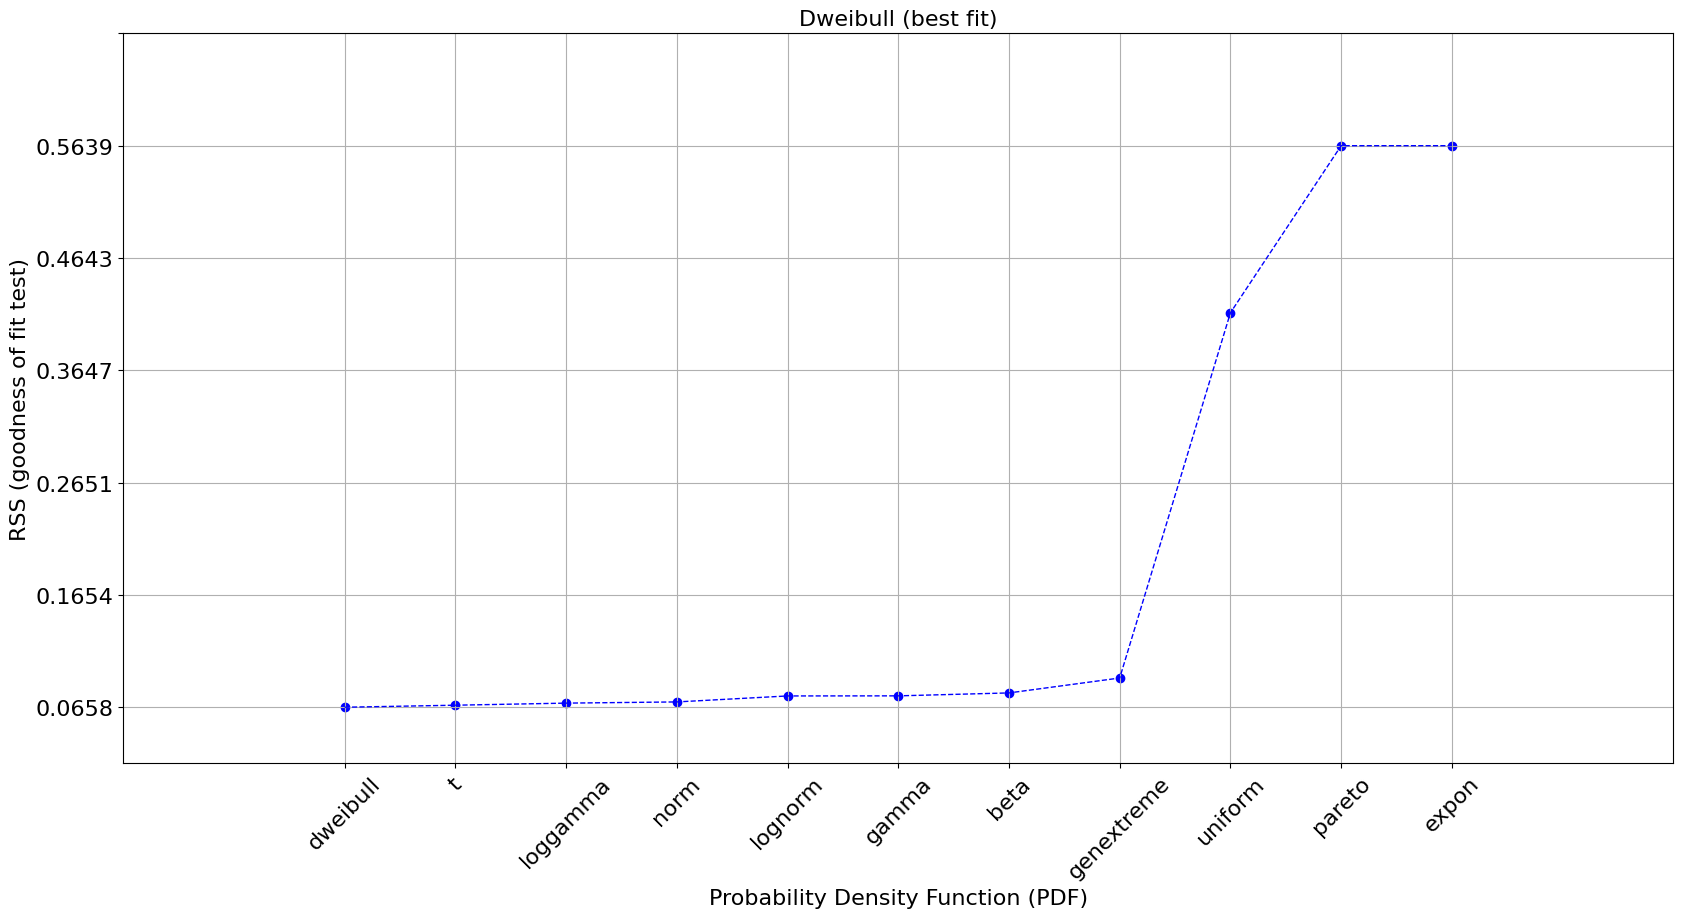

In [298]:
dfit=distfit()
dfit.fit_transform(Y)

dfit.plot_summary()

In [599]:
class BrokenPowerLaw(tf.keras.layers.Layer):#making a custom power law function so that we can use it later
    def __init__(self,alpha1,beta11,beta21,Av1):
        super(BrokenPowerLaw,self).__init__()
        self.alpha1=alpha1
        self.beta11=beta11
        self.beta21=beta21
        self.Av1=Av1
        self.Av1=tf.constant(self.Av1,dtype=tf.float32)
        #self.sigma=sigma
        
    def call(self,inputs):
        #input=inputs
        self.inputs=tf.constant(inputs,dtype=tf.float32)
        '''self.alpha1=tf.constant([self.alpha1],dtype=tf.float32)
        print('ooo')
        self.beta11=tf.constant([self.beta11],dtype=tf.float32)
        self.beta21=tf.constant([self.beta21],dtype=tf.float32)
        self.Av1=tf.constant(self.Av1,dtype=tf.float32)
        
        print('line one')'''

        mask_low=tf.less_equal(self.inputs,self.Av1)

        mask_high=tf.greater(self.inputs,self.Av1)
        

        output=tf.where(mask_low,self.alpha1*(self.inputs/self.Av1)**self.beta11, self.alpha1*(self.inputs/self.Av1)**self.beta21)
        output=tf.constant(output,dtype=tf.float32)
        return output

In [600]:
def likelihood(data,params):
    #params=tf.constant(params,dtype=tf.float32)
    
    #defining likelihood function for the broken power law distributio 
    
    ind_par=BrokenPowerLaw(params[0],params[1],params[2],params[3])
    exp_val=ind_par(data[0])
    #print('e',exp_val)
    #exp_val=tf.constant([exp_val],dtype=tf.float32)
    
    act_val=data[1]
    #print('a',act_val)
    #act_val=tf.constant([act_val],dtype=tf.float32)
    return tf.reshape([tf.exp(-tf.reduce_sum(tf.square(act_val-exp_val)))],[1])
    

In [601]:

def prior_log_prob(params):
    lower_bound=tf.constant([-2],dtype=tf.float32)
    upper_bound=tf.constant([5],dtype=tf.float32)
    log_prob=-np.log(upper_bound-lower_bound)
    plp=[]
    for i in params:
        if lower_bound<=i<=upper_bound:
            plp.append(log_prob)
        else:
            plp.append(tf.constant(np.inf))
            
    plp=tf.constant(plp,dtype=tf.float32)
    plp=tf.reshape(plp,[4,])
    return plp

#defining  prior log uniform distributions  for our variables alpha,beta1,beta2,AV
    

In [603]:

def target_log_prob(params):
    a= likelihood([X,Y],params)
    b=prior_log_prob(params)
    c=a+b
    c=tf.reshape(c,[4,])
    c=tf.constant(c,dtype=tf.float32)
    return c
#defining target log probabilites to use in our mcmc method. this is same as log(P(data/parameres)*P(parametres))

def plp(proposed_params,current_params):
    return tfp.distribution.Normal(loc=current_params,scale=[0.1,0.1,0.1,0.1]).log_prob(proposed_params)
    


        



In [613]:
zzz=tfp.mcmc.RandomWalkMetropolis(
    target_log_prob_fn=target_log_prob,
    new_state_fn=None,
    experimental_shard_axis_names=None,
    name=None)

my_list=[0.5,0.5,0.5,0.5]
#my_list=np.array(my_list)
my_list=tf.constant(my_list,dtype=tf.float32)

samples=tfp.mcmc.sample_chain(
    kernel=zzz,
    num_results=10,
    current_state=my_list
)
 

#this is random walk metroplis mcmc method from which we sample 










In [614]:
#samples
req_val=samples.all_states
print(req_val.shape)
print(req_val)
sample_mean = tf.math.reduce_mean(req_val, axis=0)
print(sample_mean)
sample_std = tf.sqrt(
    tf.math.reduce_mean(
        tf.math.squared_difference(req_val, sample_mean),
        axis=0))

print('Estimated mean: {}'.format(sample_mean))
print('Estimated standard deviation: {}'.format(sample_std))
#estimated mean for our data is given below

(10, 4)
tf.Tensor(
[[-1.2422236   0.46935773  0.00906965  1.4375756 ]
 [ 0.90516675 -0.2825997  -0.37815407  2.238264  ]
 [ 0.4868721  -1.2189198   0.27920803  1.6146281 ]
 [ 0.4868721  -1.2189198   0.27920803  1.6146281 ]
 [-0.96275866 -1.1491296   1.9426786   0.70175695]
 [-0.43078685 -0.7620598   1.3050466   0.23230678]
 [ 1.1838269  -1.1735666   1.4636275   0.54630345]
 [ 0.47331762 -0.2039063   1.4832808   0.473675  ]
 [ 0.47331762 -0.2039063   1.4832808   0.473675  ]
 [ 0.47331762 -0.2039063   1.4832808   0.473675  ]], shape=(10, 4), dtype=float32)
tf.Tensor([ 0.18469217 -0.59475553  0.9350527   0.9806488 ], shape=(4,), dtype=float32)
Estimated mean: [ 0.18469217 -0.59475553  0.9350527   0.9806488 ]
Estimated standard deviation: [0.7537533  0.56014043 0.7599659  0.6474378 ]


# the part where we did bayesian analysis is over I did many mistakes and tried many thing below are those tried  methods


In [210]:
'''def log_likelihood(tensor,pdf_func,*args):
    probabilities=pdf_func(tensor)
    probabilities=np.clip(probabilities,np.finfo(tf.float).eps,1-np.finfo(tf.float).eps)
    
    
    log_probs=np.log(probabilities)
    return log_probs'''

'def log_likelihood(tensor,pdf_func,*args):\n    probabilities=pdf_func(tensor)\n    probabilities=np.clip(probabilities,np.finfo(tf.float).eps,1-np.finfo(tf.float).eps)\n    \n    \n    log_probs=np.log(probabilities)\n    return log_probs'

In [602]:
c=tf.constant([2.6,0.01,-1.0,0.96],dtype=tf.float32)
print(type(c))

<class 'tensorflow.python.framework.ops.EagerTensor'>


In [211]:
'''c=prior_log_prob([1,2,1.5,0.96])+likelihood([X,Y],[1,2,1.5,0.96])
tf.constant(c,dtype=tf.float32)
c'''

'c=prior_log_prob([1,2,1.5,0.96])+likelihood([X,Y],[1,2,1.5,0.96])\ntf.constant(c,dtype=tf.float32)\nc'

In [213]:
target_log_prob([1,1.1,0.2,1.3])

output


<tf.Tensor: shape=(4,), dtype=float32, numpy=array([-1.9459102, -1.9459102, -1.9459102, -1.9459102], dtype=float32)>

In [283]:
 '''zzz=tfp.mcmc.RandomWalkMetropolis(
    target_log_prob_fn=target_log_prob,
    new_state_fn=None,
    experimental_shard_axis_names=None,
    name=None)

my_list=[1.,2.,3.,4.]
my_list=np.array(my_list)
#my_list=my_list.astype(np.float32)
print(type(my_list))
print(my_list[1])
print(my_list)
print(my_list.dtype)

samples=tfp.mcmc.sample_chain(
    kernel=zzz,
    num_results=1000,
    current_state=my_list
)'''

'zzz=tfp.mcmc.RandomWalkMetropolis(\n   target_log_prob_fn=target_log_prob,\n   new_state_fn=None,\n   experimental_shard_axis_names=None,\n   name=None)\n\nmy_list=[1.,2.,3.,4.]\nmy_list=np.array(my_list)\n#my_list=my_list.astype(np.float32)\nprint(type(my_list))\nprint(my_list[1])\nprint(my_list)\nprint(my_list.dtype)\n\nsamples=tfp.mcmc.sample_chain(\n   kernel=zzz,\n   num_results=1000,\n   current_state=my_list\n)'

In [149]:
 fprint(inner_kernal)
print(target_log_prob)

NameError: name 'fprint' is not defined

In [150]:
target_log_prob([1,1.1,.2,1.3])

tf.Tensor(
[1.67 0.79 0.79 0.79 0.63 0.63 1.07 1.24 1.07 0.68 0.79 1.15 0.88 0.87
 0.83 0.82 0.82 2.16 0.86 1.15 0.99 0.86 0.87 0.6  0.88 0.49 1.12 0.99
 1.34 0.79 1.67 0.71 1.7  0.67 1.61 0.74 0.96 2.53 2.38 0.63 0.82 0.71
 0.7  1.42 0.77 0.77 1.79 1.12 0.69 0.63 0.68 1.58 0.87 0.77 0.55 1.48
 1.12 1.49 0.69 1.48 0.58 1.04 1.05 1.59 0.96 1.12 0.58 1.4  1.4  0.66
 0.56 0.6  0.63 0.69 0.6  0.69 0.78 1.04 1.74 0.44 1.04 1.75 0.52 0.44
 0.6  1.07 0.46 1.05 0.93 0.97 1.08 0.69 1.73 0.41 1.04 1.89 0.66 1.89
 1.18 0.82 1.83 1.09 0.88 1.84 0.82 0.77 0.67 0.82 0.77 1.59 0.81 1.64
 1.03 0.82 0.74 2.03 1.07 0.58 1.07 0.66 0.6  0.46 1.1  0.38 0.66 0.69
 0.47 2.16 0.47 0.47 0.71 1.1  0.44 2.16 2.16 2.16 2.16 2.6  2.16 2.16
 1.67 2.16 2.16], shape=(143,), dtype=float32)
line 2
mask_low


<tf.Tensor: shape=(4,), dtype=float32, numpy=array([-1.9459102, -1.9459102, -1.9459102, -1.9459102], dtype=float32)>

In [118]:

initial_state=tf.constant([1,1.1,.2,1.3],dtype=tf.float32)
num_steps=1000
samples=tfp.mcmc.sample_chain(
    kernel=kernel,
    num_results=num_steps,
    current_state=initial_state
)

tf.Tensor(
[1.67 0.79 0.79 0.79 0.63 0.63 1.07 1.24 1.07 0.68 0.79 1.15 0.88 0.87
 0.83 0.82 0.82 2.16 0.86 1.15 0.99 0.86 0.87 0.6  0.88 0.49 1.12 0.99
 1.34 0.79 1.67 0.71 1.7  0.67 1.61 0.74 0.96 2.53 2.38 0.63 0.82 0.71
 0.7  1.42 0.77 0.77 1.79 1.12 0.69 0.63 0.68 1.58 0.87 0.77 0.55 1.48
 1.12 1.49 0.69 1.48 0.58 1.04 1.05 1.59 0.96 1.12 0.58 1.4  1.4  0.66
 0.56 0.6  0.63 0.69 0.6  0.69 0.78 1.04 1.74 0.44 1.04 1.75 0.52 0.44
 0.6  1.07 0.46 1.05 0.93 0.97 1.08 0.69 1.73 0.41 1.04 1.89 0.66 1.89
 1.18 0.82 1.83 1.09 0.88 1.84 0.82 0.77 0.67 0.82 0.77 1.59 0.81 1.64
 1.03 0.82 0.74 2.03 1.07 0.58 1.07 0.66 0.6  0.46 1.1  0.38 0.66 0.69
 0.47 2.16 0.47 0.47 0.71 1.1  0.44 2.16 2.16 2.16 2.16 2.6  2.16 2.16
 1.67 2.16 2.16], shape=(143,), dtype=float32)


ValueError: Exception encountered when calling layer 'broken_power_law_53' (type BrokenPowerLaw).

TypeError: Scalar tensor has no `len()`
Traceback (most recent call last):

  File "C:\Users\work\AppData\Local\Programs\Python\Python311\Lib\site-packages\tensorflow\python\framework\ops.py", line 336, in __len__
    raise TypeError("Scalar tensor has no `len()`")

TypeError: Scalar tensor has no `len()`



Call arguments received by layer 'broken_power_law_53' (type BrokenPowerLaw):
  • inputs=tf.Tensor(shape=(143,), dtype=float32)

In [119]:
def prior_log_prob( params):
    lower_bound=-2
    upper_bound=5
    return log_likelihood()
        

In [120]:
prior_log_prob(alpha,beta1,beta2,Av,sigma)

NameError: name 'alpha' is not defined

In [121]:
prior_log_prob([alpha,beta1,beta1,Av])

NameError: name 'alpha' is not defined

In [122]:
BrokenPowerLaw1=BrokenPowerLaw(2.6,0.01,-1,0.96)
x=BrokenPowerLaw1(X)
print('x=',x)
print('Y=',Y)
print('x-y',tf.square(x-Y))

tf.Tensor(
[1.67 0.79 0.79 0.79 0.63 0.63 1.07 1.24 1.07 0.68 0.79 1.15 0.88 0.87
 0.83 0.82 0.82 2.16 0.86 1.15 0.99 0.86 0.87 0.6  0.88 0.49 1.12 0.99
 1.34 0.79 1.67 0.71 1.7  0.67 1.61 0.74 0.96 2.53 2.38 0.63 0.82 0.71
 0.7  1.42 0.77 0.77 1.79 1.12 0.69 0.63 0.68 1.58 0.87 0.77 0.55 1.48
 1.12 1.49 0.69 1.48 0.58 1.04 1.05 1.59 0.96 1.12 0.58 1.4  1.4  0.66
 0.56 0.6  0.63 0.69 0.6  0.69 0.78 1.04 1.74 0.44 1.04 1.75 0.52 0.44
 0.6  1.07 0.46 1.05 0.93 0.97 1.08 0.69 1.73 0.41 1.04 1.89 0.66 1.89
 1.18 0.82 1.83 1.09 0.88 1.84 0.82 0.77 0.67 0.82 0.77 1.59 0.81 1.64
 1.03 0.82 0.74 2.03 1.07 0.58 1.07 0.66 0.6  0.46 1.1  0.38 0.66 0.69
 0.47 2.16 0.47 0.47 0.71 1.1  0.44 2.16 2.16 2.16 2.16 2.6  2.16 2.16
 1.67 2.16 2.16], shape=(143,), dtype=float32)
line one
line 2
mask_low
x= tf.Tensor(
[1.4946107 2.5949373 2.5949373 2.5949373 2.5890715 2.5890715 2.33271
 2.012903  2.33271   2.5910494 2.5949373 2.170435  2.5977385 2.5974417
 2.5962195 2.5959048 2.5959048 1.1555554 2.5971415 2.

In [67]:
kernel=tfp.mcmc.MetropolisHastings(
    inner_kernal=tfp.mcmc.RandomWalkMetropolis(
        target_log_prob_fn=lambda 
    )
)
    

<tf.Tensor: shape=(), dtype=float64, numpy=1.2770866427560919e-26>

In [305]:
'''class BrokenPowerLaw.Layer(tf.keras.layers.Layer):
    def __init__(self,units=1,**kwargs):
        super(BrokenPowerLaw,self).__init__(**kwargs):
        self.alpha=tf.keras.layers.Dense(units=units,activation=None)
        self.beta1=tf.keras.layers.Dense(units=units,activation=None)
        self.beta2=tf.keras.layers.Dense(units=units,activation=None)
        self.Av=tf.keras.layers.Dense(units=units,Activation=None)
        self.sigma=tf.keras.layers.Dense(units=units,Activation=None)
        
    def call(self,inputs):
        x=inputs
   '''''     
        

params=t.fit(Y)
print(params)
v,mu,sigma_=params[0],params[1],params[2]


single_dist = tfp.distributions.StudentT(df=v, loc=mu, scale=sigma_)
likelihood=single_dist.prob(Y)



(37.80742927291164, 2.526265764541371, 0.780286194729146)
tf.Tensor(
[0.14012184 0.49185788 0.42074979 0.34182267 0.48959676 0.50423602
 0.50509219 0.32660857 0.49878943 0.48416902 0.22061873 0.43749806
 0.21569686 0.25129406 0.270604   0.48804804 0.45772258 0.18027052
 0.0815189  0.50789884 0.45193875 0.4283709  0.32260127 0.44191623
 0.21974355 0.06624724 0.46989401 0.50583252 0.50290695 0.50495104
 0.50574352 0.36502999 0.07717122 0.30031153 0.40051753 0.33087644
 0.46130344 0.10408218 0.05192591 0.49756412 0.47015487 0.42994976
 0.30861917 0.30900747 0.44905847 0.39810334 0.4573715  0.49820987
 0.36539077 0.46723663 0.36242593 0.38907494 0.0056501  0.4885912
 0.44373145 0.50455847 0.46550535 0.33459148 0.50775277 0.45055073
 0.49129952 0.47296837 0.49954125 0.49687074 0.38020584 0.50665656
 0.37146695 0.49581562 0.47141532 0.50518924 0.08136231 0.0182999
 0.49538502 0.43927826 0.47989868 0.41279912 0.4368362  0.4505612
 0.05602643 0.28373994 0.15100417 0.16320903 0.26084279 0.28373

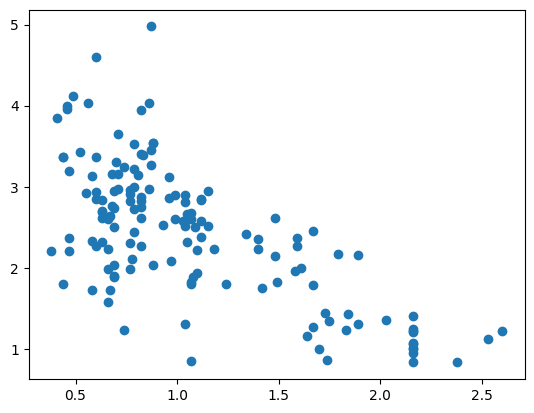

In [95]:
hplt.scatter(X,Y)

In [30]:
for i in X:
    (math.gamma(v+1/2)/math.gamma(v/2))(sigma_/math.pi*v)**(1/2)*(1+(sigma_*(x-i)**2)/v)**(-(v+1)/2)
    

NameError: name 'math' is not defined

TypeError: scatter() missing 1 required positional argument: 'y'

In [204]:
X.isna().sum()

0

In [71]:
Y

0      1.67
1      0.79
2      0.79
3      0.79
4      0.63
       ... 
146    2.16
147    2.16
148    1.67
149    2.16
150    2.16
Name: Av (mag), Length: 151, dtype: float64

In [ ]:
kernel=tfp.mcmc.MetropolisHastings(    
    tfp.mcmc.RandomWalkMetropolis(
    target_log_prob_fn=target_log_prob,
    new_state_fn=None,
    experimental_shard_axis_names=None,
    name=None
))
   
   
my_list1=[0.5,0.5,0.5,0.5]
#my_list=np.array(my_list)
my_list1=tf.constant(my_list,dtype=tf.float32)


samples_1=tfp.mcmc.sample_chain(
    kernel=kernel,
    num_results=10,
    current_state=my_list1
    )  

In [205]:
df = tf.constant(2.0)
loc = tf.constant(2.0)
scale = tf.constant(11.0)
dist = tfd.StudentT(df=df, loc=loc, scale=scale)


TypeError: ('Keyword argument not understood:', 'scale')

<class 'tensorflow.python.framework.ops.EagerTensor'>


InvalidArgumentError: {{function_node __wrapped__StridedSlice_device_/job:localhost/replica:0/task:0/device:CPU:0}} Index out of range using input dim 1; input has only 1 dims [Op:StridedSlice] name: strided_slice/